[View in Colaboratory](https://colab.research.google.com/github/RaulMedeiros/Classification_Framework_Visualization/blob/master/Confusion_Matrix_aggregation.ipynb)

# UPLOAD FILE FROM PC

In [1]:
#Uploading the Dataset 
from google.colab import files
uploaded = files.upload()

Saving InceptionV3.csv to InceptionV3.csv


# Process


In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv('InceptionV3.csv')
df.drop(np.arange(2,len(df),3),axis=0,inplace=True)
df.reset_index(inplace=True)
df.drop(np.arange(1,len(df),2),axis=0,inplace=True)
df.reset_index(inplace=True)
df

,level_0,index,Unnamed: 0,model,classifier,fit_time,score_time,test_accuracy,test_cm_00,test_cm_01,...,train_f1_macro,train_f1_micro,train_f1_weighted,train_matthews_corrcoef,train_precision_macro,train_precision_micro,train_precision_weighted,train_recall_macro,train_recall_micro,train_recall_weighted
0,0,0,mean,InceptionV3,Bayes,0.12519288063049316,0.1906583786010742,0.47345426863983137,6.2,0.0,...,0.31991909243412037,0.4765796143519346,0.4015464363028249,0.23042731973484418,0.38447087541388025,0.4765796143519346,0.427166611034547,0.36971743654968015,0.4765796143519346,0.4765796143519346
1,2,3,mean,InceptionV3,MLP,41.7743332862854,0.8494430541992187,0.5112858664550988,17.2,2.6,...,0.4228560680343968,0.5499993708554101,0.4794965568359773,0.33823523289354884,0.5391220776958997,0.5499993708554101,0.5369562631651127,0.43523149649190485,0.5499993708554101,0.5499993708554101
2,4,6,mean,InceptionV3,Nearest_Neighbors,0.3883544921875,181.11145567893982,0.48869757174392936,19.6,6.8,...,0.5255461276783266,0.5959287612454871,0.571644183102707,0.4110389544518799,0.5942862025165807,0.5959287612454871,0.5904222555595228,0.5000134968019635,0.5959287612454871,0.5959287612454871
3,6,9,mean,InceptionV3,Random_Forest,52.404231262207034,28.859786224365234,0.5183100498433442,15.8,0.6,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,8,12,mean,InceptionV3,SVM_Linear,89.97265448570252,131.41940712928772,0.4534852618703926,36.4,12.8,...,0.6798299696459587,0.6615498621098643,0.6619880493502229,0.5590552777400253,0.6554435539170331,0.6615498621098643,0.6882213297900853,0.7319708443523669,0.6615498621098643,0.6615498621098643
5,10,15,mean,InceptionV3,SVM_Polynomial,153.00247077941896,139.16802639961242,0.2547498907266403,5.8,7.6,...,0.18917252306699145,0.25010332820408887,0.2010121789285384,0.10111082288032694,0.17095884393921823,0.25010332820408887,0.22297532066730477,0.31986415523941786,0.25010332820408887,0.25010332820408887
6,12,18,mean,InceptionV3,SVM_RBF,120.66600098609925,144.62557549476622,0.4857120031735187,28.6,13.6,...,0.9899740095905158,0.9892860542191713,0.9893014986036176,0.9851764395447618,0.9861397150124993,0.9892860542191713,0.9894742387255221,0.9939934316580921,0.9892860542191713,0.9892860542191713


In [3]:
n_classes = 5
cols =[]
for i in range(n_classes): 
  for j in range(n_classes):
    cols.append('test_cm_'+str(i)+str(j))
    
dfcm = pd.DataFrame(df,columns=cols)
dfcm

,test_cm_00,test_cm_01,test_cm_02,test_cm_03,test_cm_04,test_cm_10,test_cm_11,test_cm_12,test_cm_13,test_cm_14,...,test_cm_30,test_cm_31,test_cm_32,test_cm_33,test_cm_34,test_cm_40,test_cm_41,test_cm_42,test_cm_43,test_cm_44
0,6.2,0.0,36.2,10.8,6.8,5.2,0.0,91.6,14.6,4.4,...,0.6,0.0,44.6,34.0,29.2,0.0,0.0,7.6,13.0,30.8
1,17.2,2.6,34.2,5.0,1.0,8.8,1.2,97.0,6.6,2.2,...,0.0,0.2,50.6,41.2,16.4,0.2,0.0,8.8,21.8,20.6
2,19.6,6.8,26.2,5.8,1.6,8.6,15.4,81.8,7.4,2.6,...,1.2,3.8,50.4,36.4,16.6,0.0,0.8,9.6,22.0,19.0
3,15.8,0.6,35.8,7.0,0.8,6.0,1.6,98.0,8.0,2.2,...,0.0,0.0,49.8,41.8,16.8,0.0,0.0,8.8,19.2,23.4
4,36.4,12.8,6.4,3.0,1.4,17.6,39.4,44.4,9.6,4.8,...,2.4,9.8,23.2,44.4,28.6,0.0,2.0,2.0,14.6,32.8
5,5.8,7.6,6.4,21.6,18.6,8.2,16.6,24.4,37.0,29.6,...,6.0,6.4,4.8,32.0,59.2,0.4,0.4,0.4,4.8,45.4
6,28.6,13.6,13.8,2.4,1.6,12.4,30.0,62.8,8.4,2.2,...,1.8,6.6,43.0,40.2,16.8,0.0,1.8,8.4,20.4,20.8


In [8]:
clf_idx = 4

# 'Bayes',              ## 0
# 'MLP',                ## 1
# 'Nearest_Neighbors',  ## 2
# 'Random_Forest',      ## 3
# 'SVM_Linear',         ## 4
# 'SVM_Polynomial',     ## 5
# 'SVM_RBF',            ## 6

c =np.array(np.array(dfcm.iloc[clf_idx].values.reshape((n_classes,n_classes)),dtype=np.float)*5,dtype=np.int)
c

array([[182,  64,  32,  15,   7],
       [ 88, 197, 222,  48,  24],
       [ 49, 400, 600, 212,  71],
       [ 12,  49, 116, 222, 143],
       [  0,  10,  10,  73, 164]])

In [28]:
cnf_matrix = np.array( [[np.sum(c[:2,:2]),np.sum(c[:2,-2:])],
                        [np.sum(c[-2:,:2]),np.sum(c[-2:,-2:])]] )               
print(cnf_matrix)

[[531  94]
 [ 71 602]]


In [16]:
cnf_matrix = np.array( [[       c[0,0]   ,np.sum(c[1:3,0])  ,np.sum(c[3:,0])],
                        [np.sum(c[0,1:3]),np.sum(c[1:3,1:3]),np.sum(c[3:,1:3])],
                        [np.sum(c[0,3:]) ,np.sum(c[1:3:,3:]),np.sum(c[3:,3:])]] ).T               
print(cnf_matrix)

[[ 182   96   22]
 [ 137 1419  355]
 [  12  185  602]]


In [9]:
cnf_matrix = np.array( [[np.sum(c[:3,:3]),np.sum(c[:3,3:])],
                        [np.sum(c[3:,:3]),np.sum(c[3:,3:])]] )               
print(cnf_matrix)

[[1834  377]
 [ 197  602]]


Normalized confusion matrix
[[0.8496     0.1504    ]
 [0.10549777 0.89450223]]


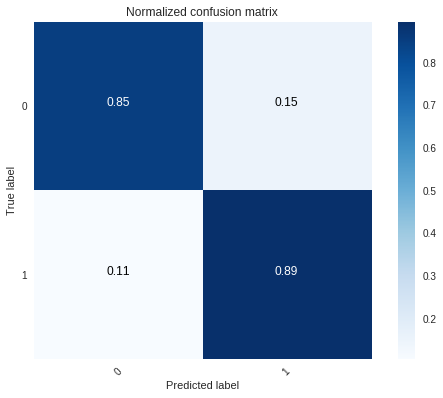

In [29]:
import matplotlib.pyplot as plt
import itertools

'''http://scikit-learn.org/stable/auto_examples/model_selection/
   plot_confusion_matrix.html with minor changes'''

def plot_confusion_matrix(cm, classes=[],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if (not classes):
        classes = list(map(str,np.arange(len(cnf_matrix))))     
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.grid(False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return True

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True,
                      title='Normalized confusion matrix')

plt.show()